# Estudo do problema de Custumer Churn
- Escolha do melhor modelo
- Escolha da melhor técnica para balanceamento de classes


# Os principais indicadores de customer churn (rotatividade de clientes) são:

- Duração do relacionamento com o banco (L): O tempo que o cliente mantém relacionamento com o banco é um indicador crucial. Tanto o primeiro quanto o segundo artigo mencionam que a duração do relacionamento pode ser um fator determinante para a rotatividade, embora o segundo artigo não encontre um impacto significativo da "tenure" (tempo de relacionamento) na taxa de rotatividade.

- Número total de transações anuais da conta do cliente (F): A frequência com que o cliente realiza transações também é um indicador importante. O primeiro artigo destaca esse fator como uma das três variáveis essenciais para a modelagem do comportamento de rotatividade, juntamente com L e M. O segundo artigo também considera o número de produtos que um cliente utiliza como um indicador de fidelidade e rentabilidade, o que pode estar indiretamente relacionado à frequência de transações.

- Média anual do saldo da conta do cliente (M): O saldo médio mantido pelo cliente na conta é outro indicador relevante. O primeiro artigo o inclui como uma das três variáveis chave para a modelagem, enquanto o segundo artigo observa que clientes com saldos elevados (acima de $85.000) têm maior probabilidade de rotatividade, possivelmente devido a ofertas mais atrativas de outros bancos.

- Dados demográficos e comportamentais: O segundo artigo explora o impacto de variáveis como gênero, idade, país de origem, posse de cartão de crédito e status de membro ativo na rotatividade de clientes. O primeiro artigo também menciona a inclusão de variáveis comportamentais e demográficas na modelagem, embora não especifique quais.

- Pontuação de crédito: O segundo artigo analisa a pontuação de crédito e observa que clientes com histórico de crédito ruim (pontuação abaixo de 400) têm maior probabilidade de deixar o banco.
Combinação de Variáveis: O segundo artigo também destaca a criação de novas variáveis combinando as existentes, como "TenureByAge", "BalanceSalaryRatio" e "CreditScoreGivenAge", para melhorar o desempenho dos modelos de aprendizado de máquina.
Referências (ABNT)

## Referencias:
- Alizadeh, M., Sadrian Zadeh, D., Moshiri, B., & Montazeri, A. (2023). Development of a Customer Churn Model for Banking Industry Based on Hard and Soft Data Fusion. IEEE Access, 11, 29759–29768. https://doi.org/10.1109/ACCESS.2023.3257352
- Singh, P. P., Anik, F. I., Senapati, R., Sinha, A., Sakib, N., & Hossain, E. (2024). Investigating customer churn in banking: A machine learning approach and visualization app for data science and management. Data Science and Management, 7, 7–16. https://doi.org/10.1016/j.dsm.2023.09.002

# Descrição das colunas:


Customer_Age - Variável demográfica - Idade do cliente em anos

Gender - Variável demográfica - M=Masculino, F=Feminino

Dependent_count - Variável demográfica - Número de dependentes

Education_Level - Variável demográfica - Qualificação educacional do titular da conta (exemplo: ensino médio, graduação, etc.)

Marital_Status - Variável demográfica - Estado civil (Casado, Solteiro, Divorciado, Desconhecido)

Income_Category - Variável demográfica - Categoria de renda anual do titular da conta (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Desconhecido)

Card_Category - Variável de produto - Tipo de cartão (Blue, Silver, Gold, Platinum)

Months_on_book - Período de relacionamento com o banco

Total_Relationship_Count - Número total de produtos mantidos pelo cliente

Months_Inactive_12_mon - Número de meses inativo nos últimos 12 meses

Contacts_Count_12_mon - Número de contatos nos últimos 12 meses

Credit_Limit - Limite de crédito no cartão de crédito

Total_Revolving_Bal - Saldo total rotativo no cartão de crédito

Avg_Open_To_Buy - Linha de crédito disponível para compras (Média dos últimos 12 meses)

Total_Amt_Chng_Q4_Q1 - Mudança no valor das transações (Q4 sobre Q1)

Total_Trans_Amt - Valor total das transações (Últimos 12 meses)

Total_Trans_Ct - Contagem total de transações (Últimos 12 meses)

Total_Ct_Chng_Q4_Q1 - Mudança na contagem de transações (Q4 sobre Q1)

Avg_Utilization_Ratio - Taxa média de utilização do cartão

Churn: Se o cliente deu churn ou não (variável resposta)

In [2]:
!pip install dataprep

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is still looking at multiple versions of 

In [38]:
!pip install imblearn

In [78]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler, TomekLinks, EditedNearestNeighbours, CondensedNearestNeighbour, OneSidedSelection, NeighbourhoodCleaningRule
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from google.colab import files
from dataprep.eda import create_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from sklearn.decomposition import PCA
import plotly.graph_objects as go

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.columns.to_list()

['Unnamed: 0',
 'CLIENTNUM',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'churn']

In [5]:
lista_colunas = ['CLIENTNUM',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'churn']

In [6]:
df = df[lista_colunas]
df

CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
0      768805383            45      M                3     High School   
1      818770008            49      F                5        Graduate   
2      713982108            51      M                3        Graduate   
3      769911858            40      F                4     High School   
4      709106358            40      M                3      Uneducated   
...          ...           ...    ...              ...             ...   
10122  772366833            50      M                2        Graduate   
10123  710638233            41      M                2         Unknown   
10124  716506083            44      F                1     High School   
10125  717406983            30      M                2        Graduate   
10126  714337233            43      F                2        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
0            Married     $60K - $80K          Blue              39   
1             Single  Less than $40K          Blue              44   
2            Married    $80K - $120K          Blue              36   
3            Unknown  Less than $40K          Blue              34   
4            Married     $60K - $80K          Blue              21   
...              ...             ...           ...             ...   
10122         Single     $40K - $60K          Blue              40   
10123       Divorced     $40K - $60K          Blue              25   
10124        Married  Less than $40K          Blue              36   
10125        Unknown     $40K - $60K          Blue              36   
10126        Married  Less than $40K        Silver              25   

       Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                             5  ...                      3       12691.0   
1                             6  ...                      2        8256.0   
2                             4  ...                      0        3418.0   
3                             3  ...                      1        3313.0   
4                             5  ...                      0        4716.0   
...                         ...  ...                    ...           ...   
10122                         3  ...                      3        4003.0   
10123                         4  ...                      3        4277.0   
10124                         5  ...                      4        5409.0   
10125                         4  ...                      3        5281.0   
10126                         6  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476             117                0.857   
10123             8

In [7]:
print(df.info())  # Verificar tipos de dados e missings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
print(df.describe())  # Estatísticas descritivas

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

Computing size-agg-9be803fb6df3ca4a180f1fe38900d184:  84%|████████▍ | 2609/3104 [00:01<00:00, 1606.66it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


DataPrep Report
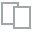
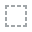
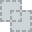
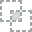
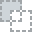
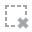
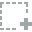
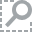
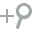
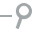
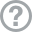
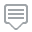
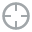
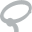
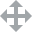
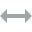
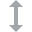
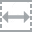
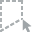
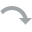
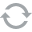
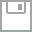
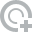
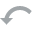
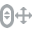
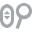
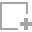
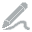
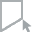
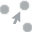
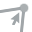
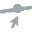

In [9]:
create_report(df)

In [10]:
#Não temos valores missing ou nulos
#Na analise exploratória nenhuma das variáveis mostrou-se correlacionada com outra em um nível que pudesse ser excluída.  Para ser excluída deveria ter 0.9 ou mais de correlação.

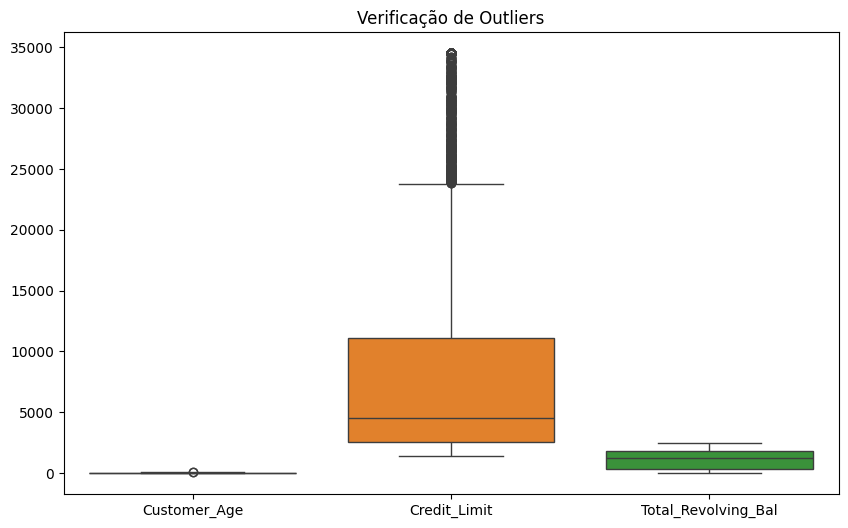

In [11]:
# Análise de outliers (usando boxplot para variáveis numéricas)
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal']])
plt.title('Verificação de Outliers')
plt.show()

Dada a importância do limite de crédito do cliente por sua relação com a pontuação de crédito, os outliers não serão tratados ou excluídos. É importante observar que, na prática bancária, geralmente existe uma forte correlação entre credit score e credit limit. Um credit score mais alto geralmente resulta em um credit limit mais alto, pois indica um menor risco de inadimplência para o banco. Por outro lado, um credit score mais baixo pode levar a um credit limit mais baixo ou até mesmo à negação de crédito. Um exemplo, é o Serasa Score,  um fator importante que influencia o limite do cartão de crédito.
Quanto maior o score, maior a probabilidade de obter um limite mais alto. Isso ocorre porque o score reflete o histórico de crédito e o risco de inadimplência do consumidor. Os bancos e instituições financeiras utilizam o score para avaliar o risco de crédito de um cliente e, com base nessa avaliação, determinam o limite do cartão de crédito que será disponibilizado.


Serasa. Serasa Score: O que é e como funciona? Disponível em: https://www.serasa.com.br/score/blog/serasa-score-cartao-credito/. Acesso em: 07 de setembro de 2024.

In [12]:
# Transformação de variáveis categóricas em numéricas
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Marital_Status'] = labelencoder.fit_transform(df['Marital_Status'])
df['Education_Level'] = labelencoder.fit_transform(df['Education_Level'])
df['Income_Category'] = labelencoder.fit_transform(df['Income_Category'])
df['Card_Category'] = labelencoder.fit_transform(df['Card_Category'])

In [13]:
df

CLIENTNUM  Customer_Age  Gender  Dependent_count  Education_Level  \
0      768805383            45       1                3                3   
1      818770008            49       0                5                2   
2      713982108            51       1                3                2   
3      769911858            40       0                4                3   
4      709106358            40       1                3                5   
...          ...           ...     ...              ...              ...   
10122  772366833            50       1                2                2   
10123  710638233            41       1                2                6   
10124  716506083            44       0                1                3   
10125  717406983            30       1                2                2   
10126  714337233            43       0                2                2   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                   1                2              0              39   
1                   2                4              0              44   
2                   1                3              0              36   
3                   3                4              0              34   
4                   1                2              0              21   
...               ...              ...            ...             ...   
10122               2                1              0              40   
10123               0                1              0              25   
10124               1                4              0              36   
10125               3                1              0              36   
10126               1                4              3              25   

       Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                             5  ...                      3       12691.0   
1                             6  ...                      2        8256.0   
2                             4  ...                      0        3418.0   
3                             3  ...                      1        3313.0   
4                             5  ...                      0        4716.0   
...                         ...  ...                    ...           ...   
10122                         3  ...                      3        4003.0   
10123                         4  ...                      3        4277.0   
10124                         5  ...                      4        5409.0   
10125                         4  ...                      3        5281.0   
10126                         6  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [15]:
# Modelos que serão testados
melhores_modelos_churn = {
    "Regressão Logística": LogisticRegression(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Machines (GBM)": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
}

In [16]:
# Técnicas de balanceamento a serem avaliadas
tecnicas_balanceamento = {
    'Nenhuma': None,  # Sem técnica de balanceamento
    'Random Undersampling': RandomUnderSampler(),
    'NearMiss': NearMiss(),
    'Tomek Links': TomekLinks(),
    'Edited Nearest Neighbours': EditedNearestNeighbours(),
    'Condensed Nearest Neighbour': CondensedNearestNeighbour(),
    'One-Sided Selection': OneSidedSelection(),
    'Neighbourhood Cleaning Rule': NeighbourhoodCleaningRule(),
    'Random Oversampling': RandomOverSampler(),
    'SMOTE': SMOTE(),
    'ADASYN': ADASYN(),
    'Borderline-SMOTE': SMOTE(),
    'SVM SMOTE': SMOTE(),
    'SMOTE + Tomek Links': SMOTETomek(),
    'SMOTE + ENN': SMOTEENN(),
    'Undersampling + Oversampling': SMOTEENN()
}

In [17]:
# Função para avaliação do modelo e retorno da curva ROC
def evaluate_model(model, X_test, y_test):
    """
    Avalia o modelo gerando a curva ROC e AUC.
    """
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Taxas de falso e verdadeiro positivo
    roc_auc = auc(fpr, tpr)  # Cálculo da AUC
    return fpr, tpr, roc_auc

In [18]:
# Variável alvo e features
X = df.drop('churn', axis=1)
y = df['churn']

In [19]:
# Normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# Divisão dos dados em treino e teste
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
# Armazenando os resultados de AUC-ROC para cada técnica e modelo
resultados_auc = {}

<Figure size 2400x2400 with 0 Axes>

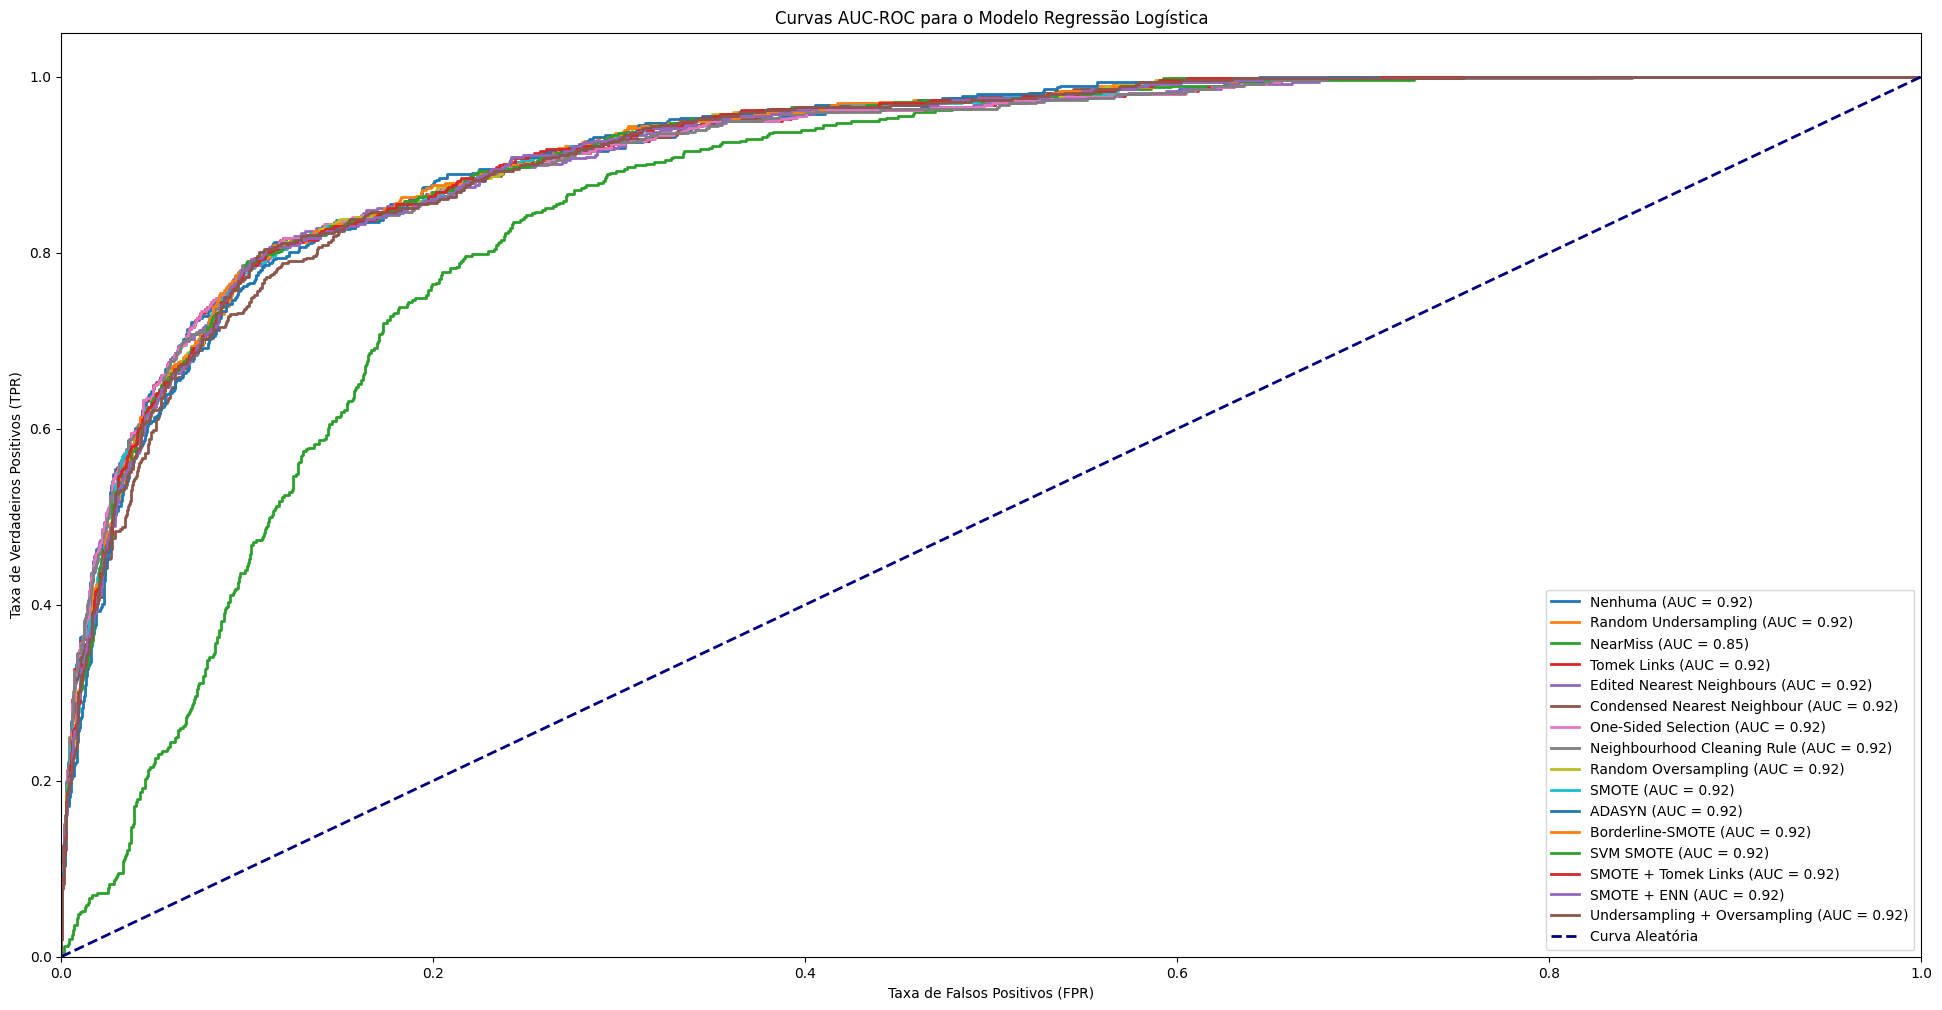

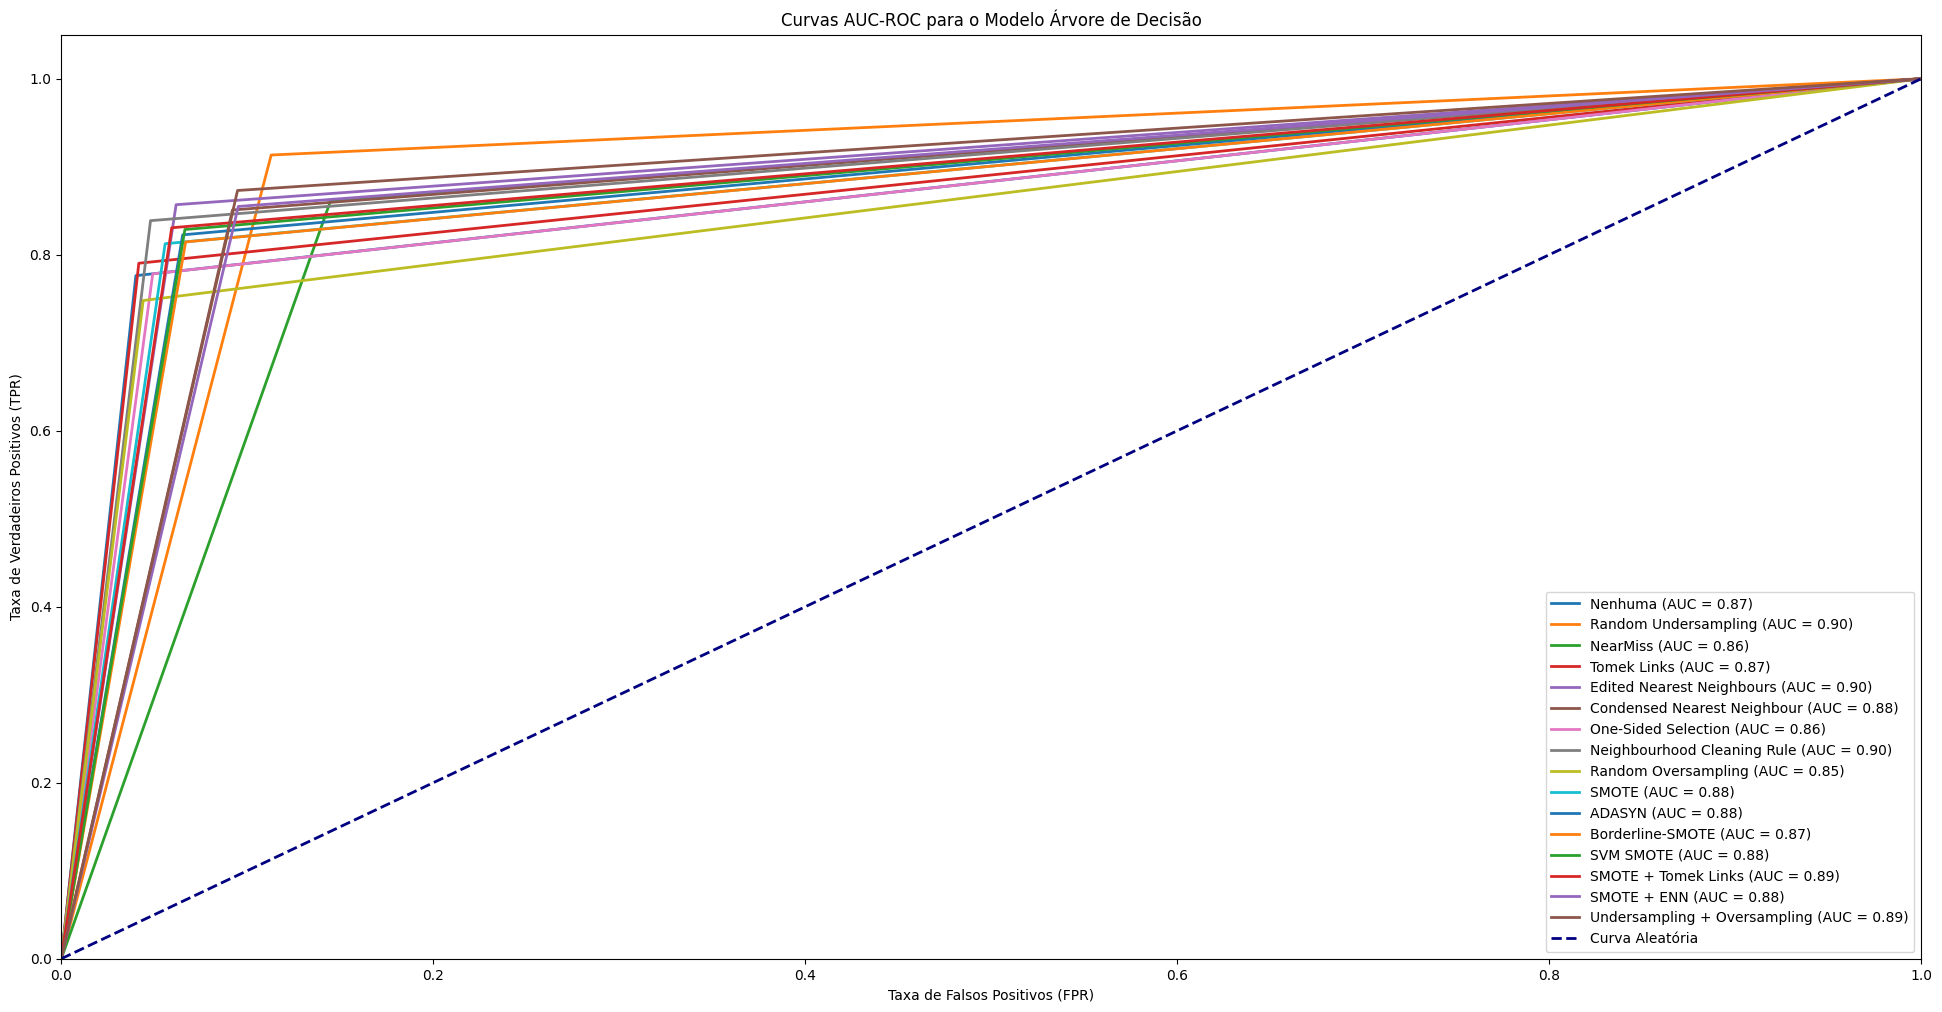

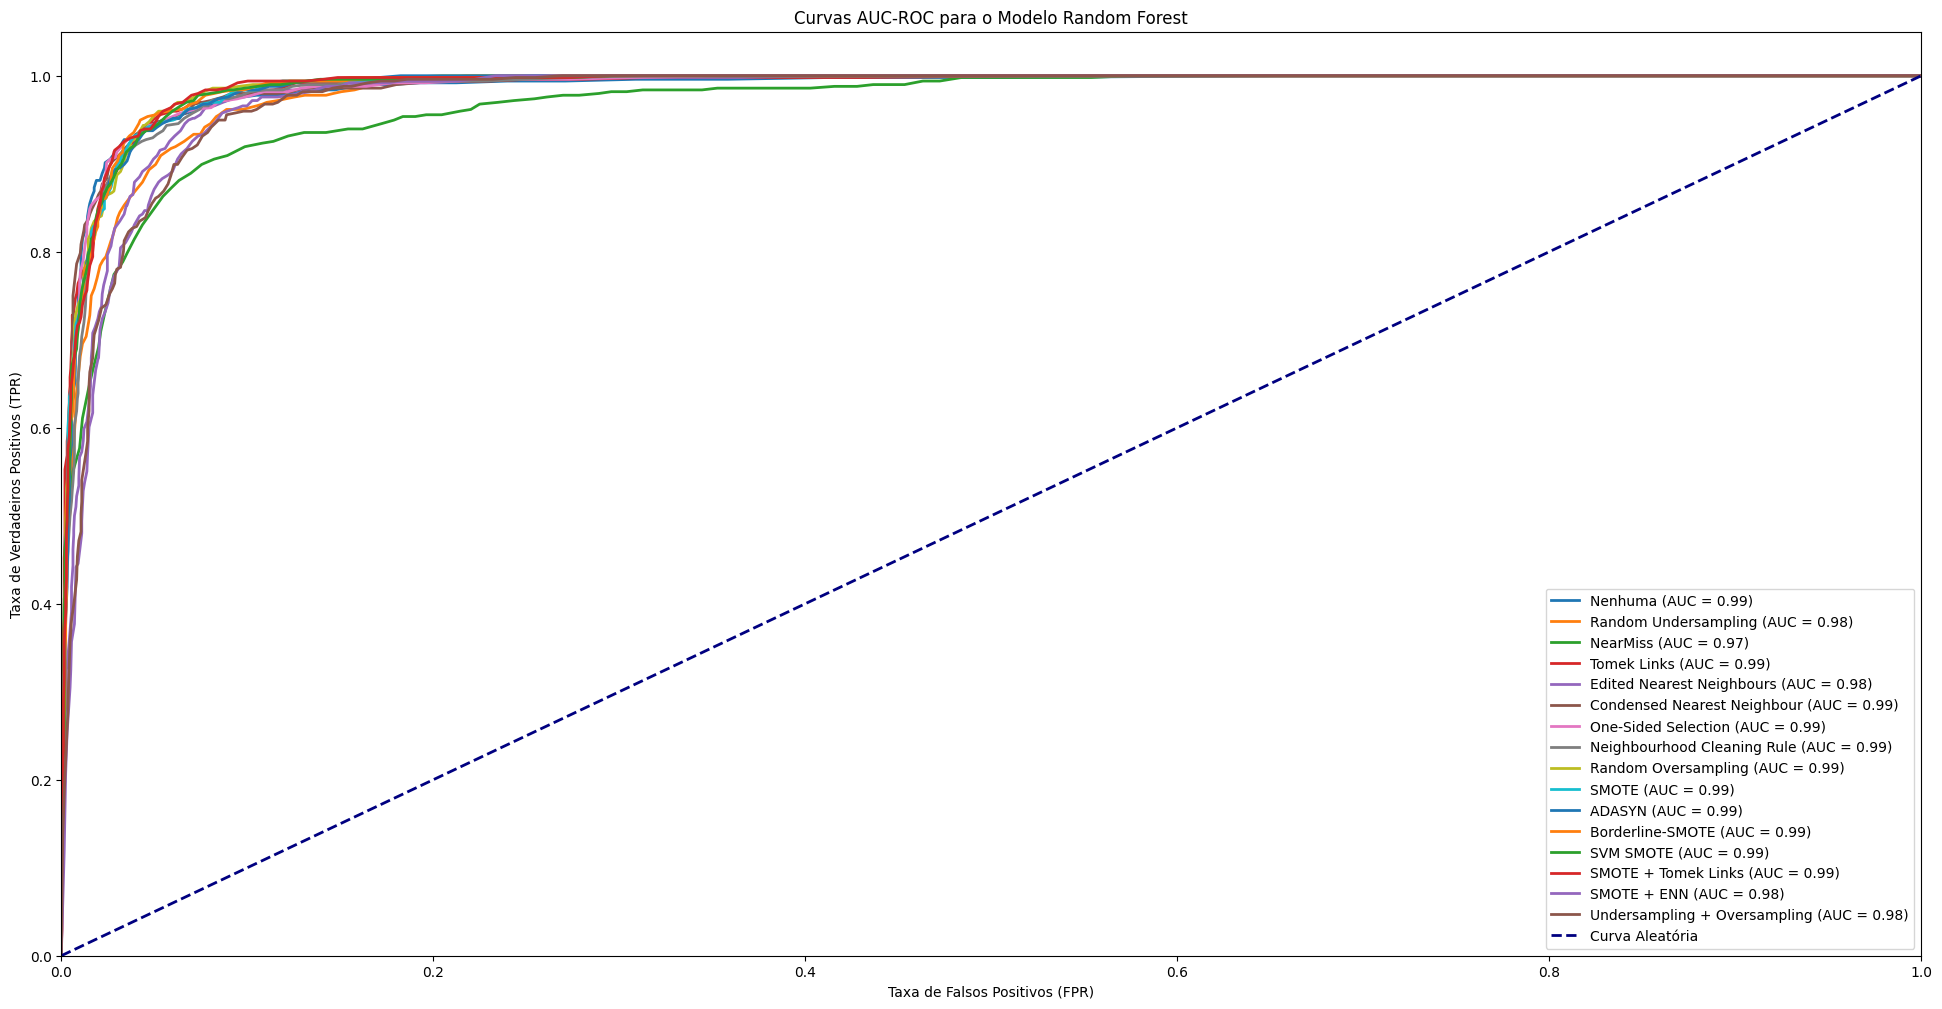

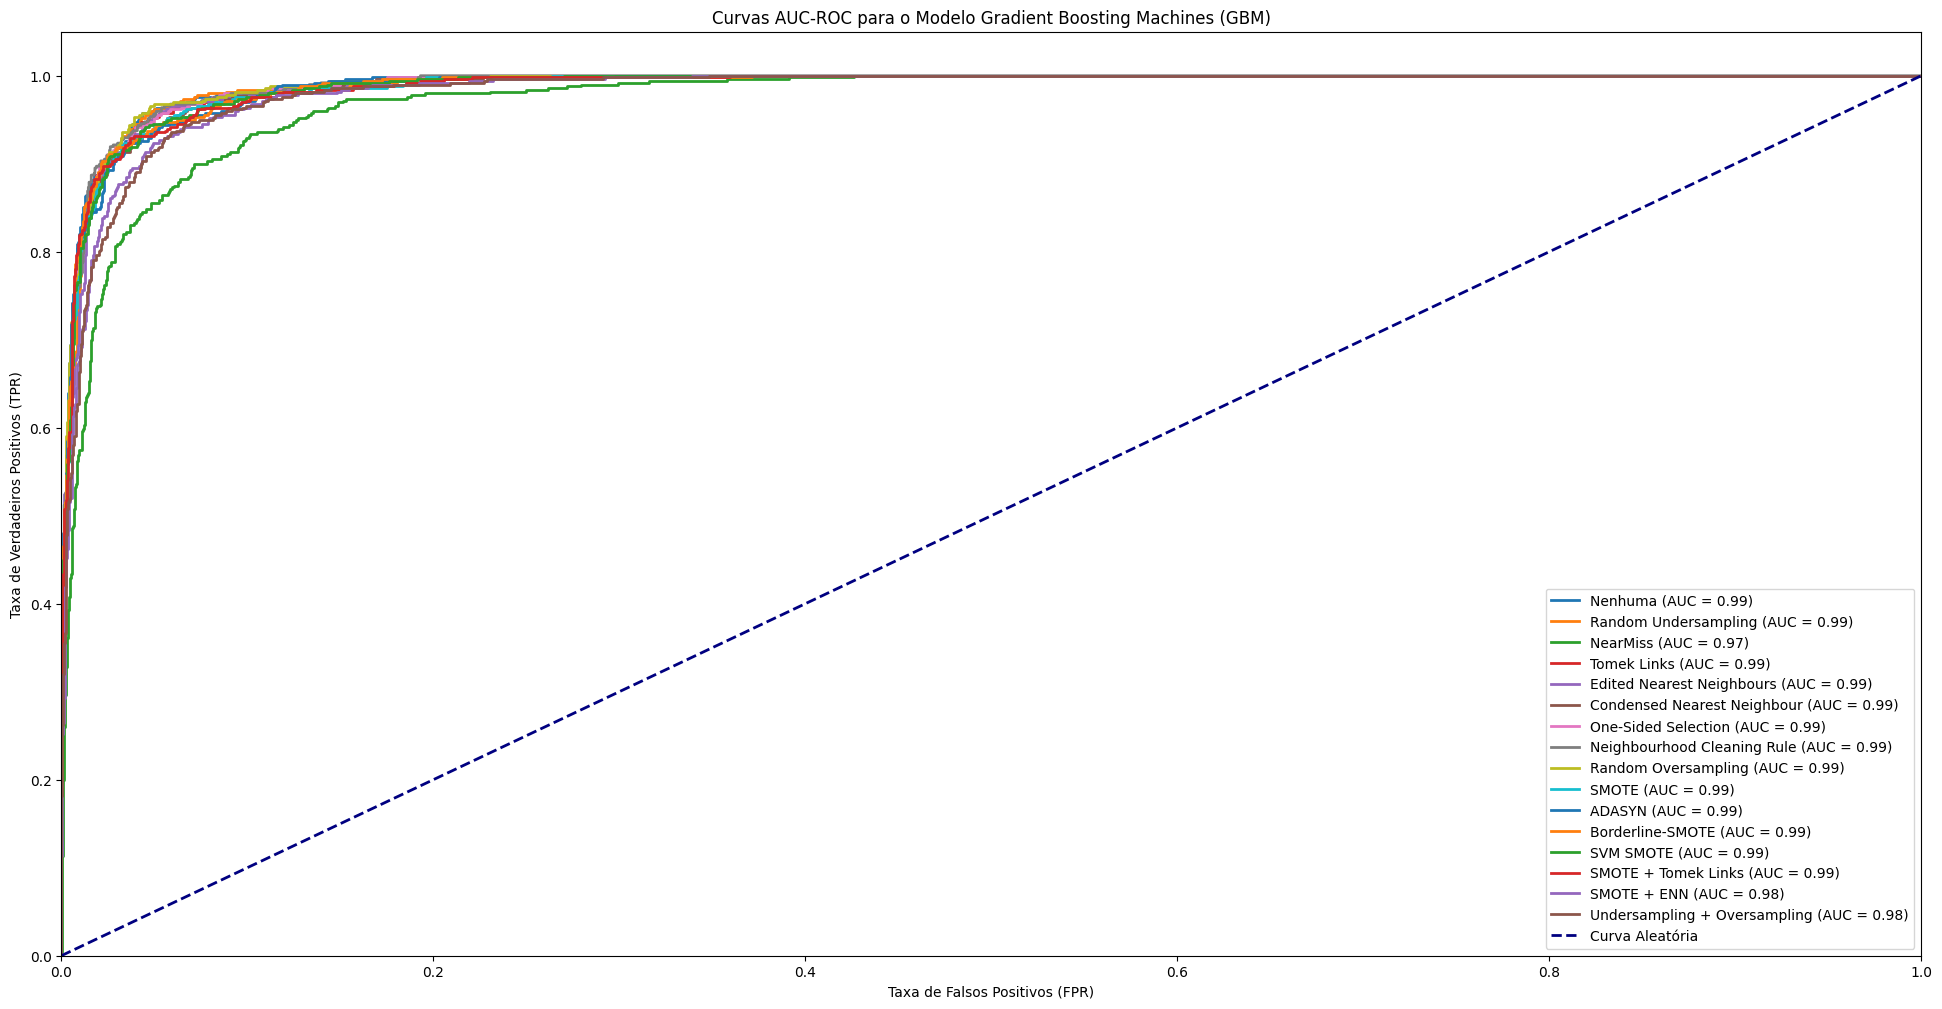

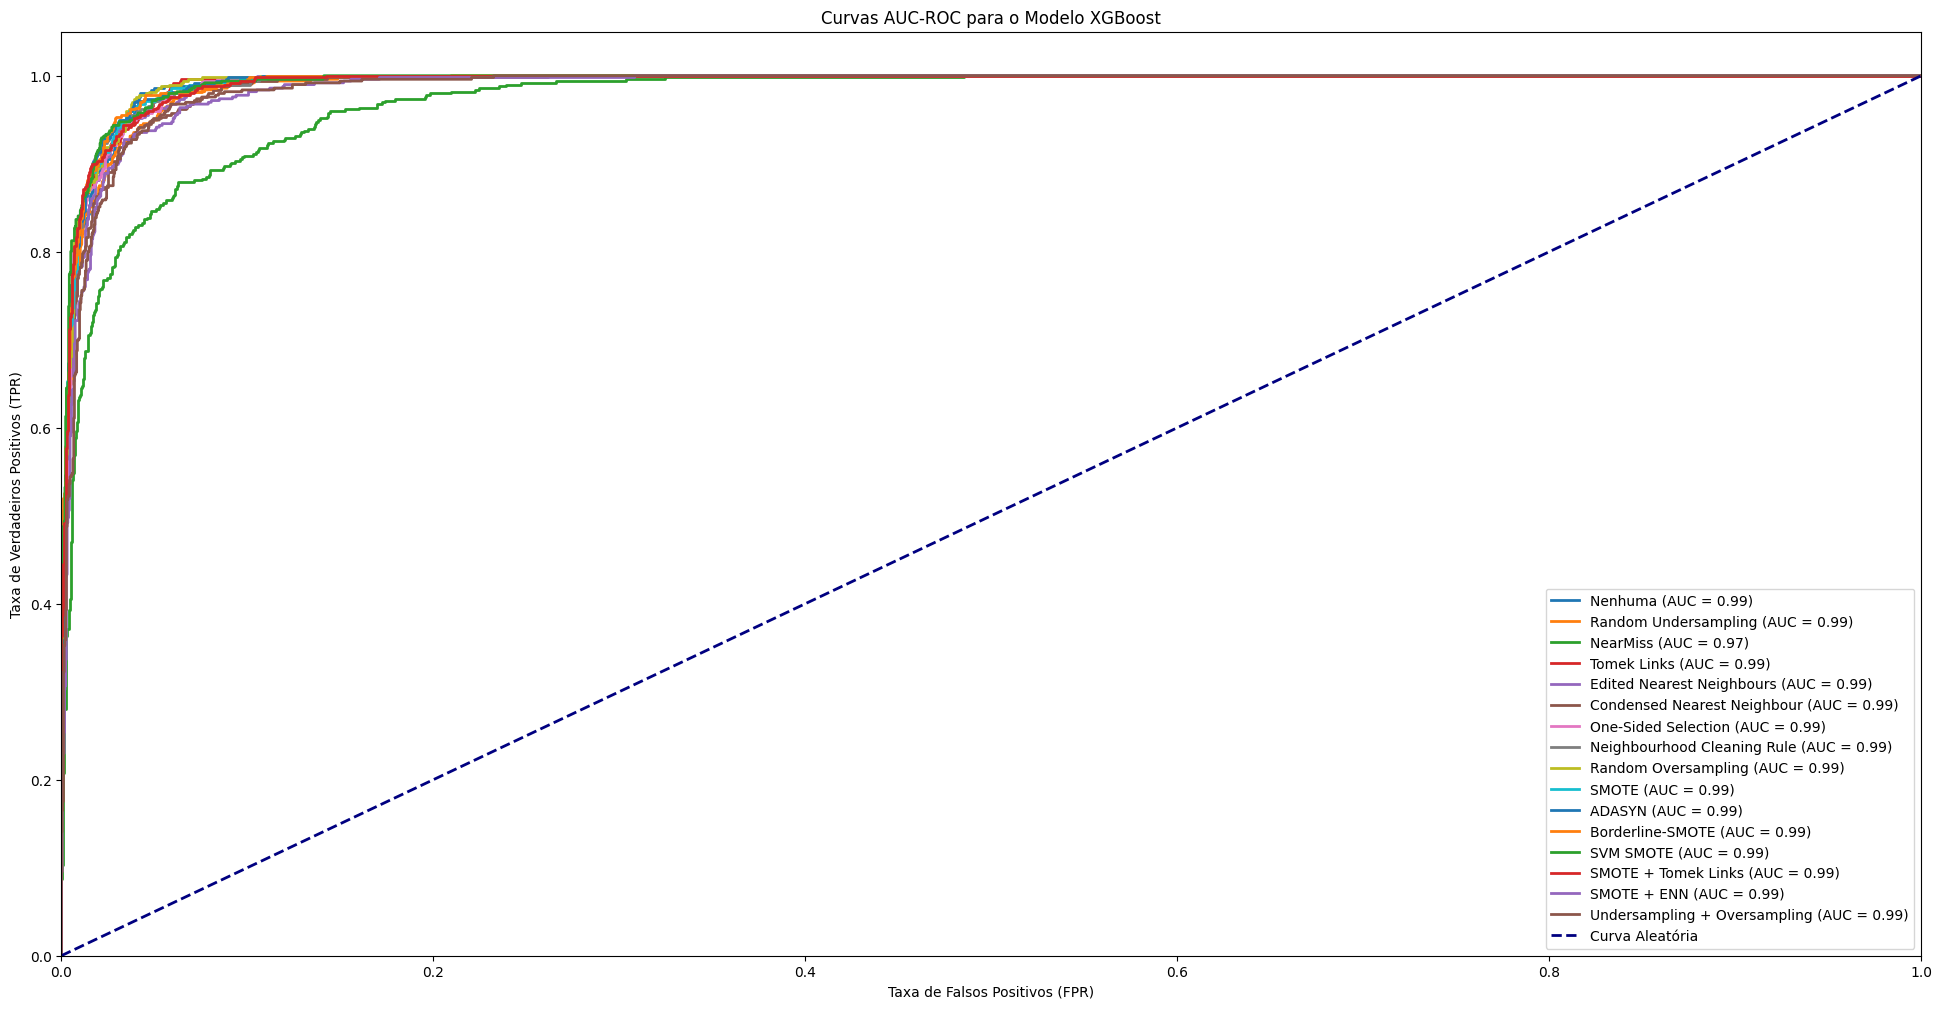

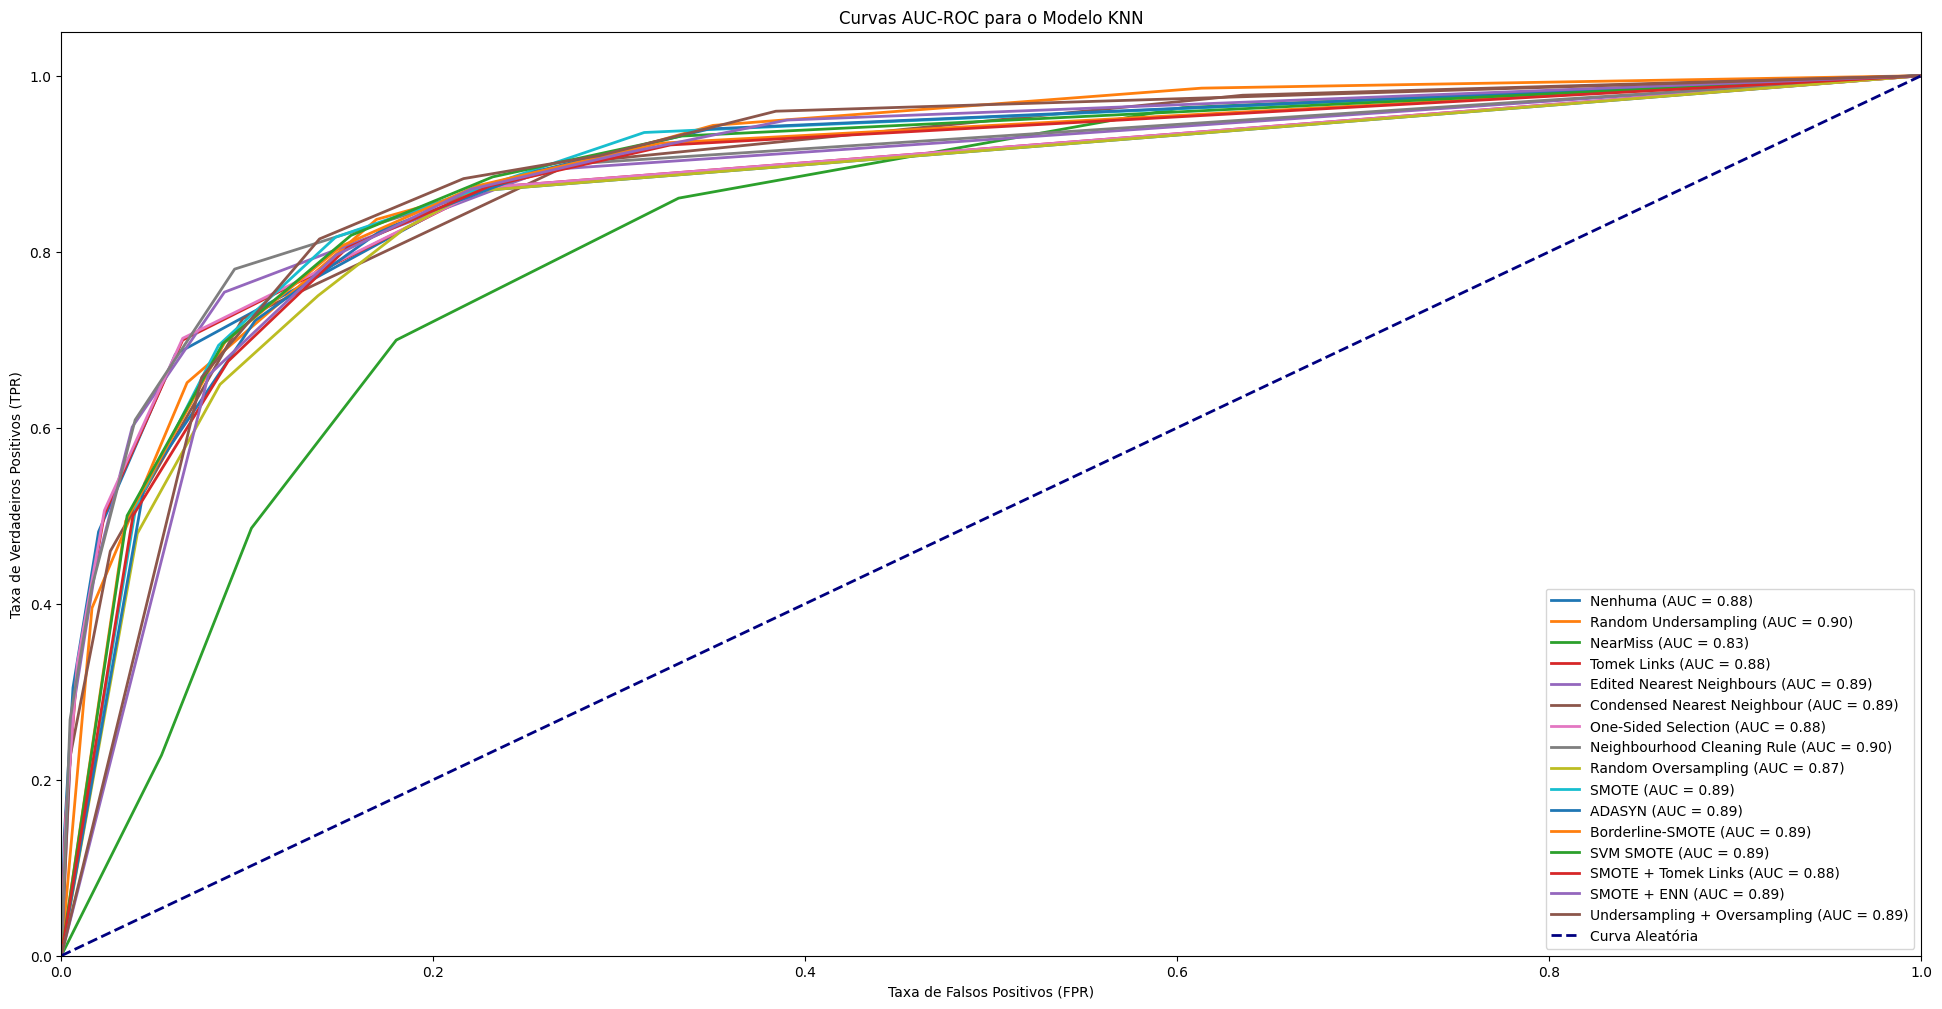

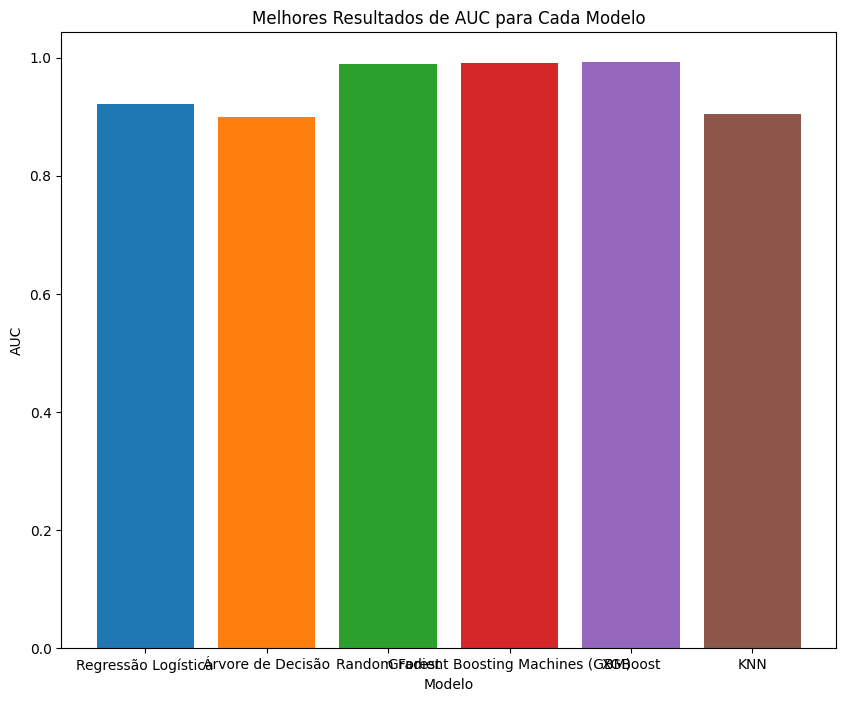

In [32]:
# Configurações dos gráficos
plt.figure(figsize=(24, 24))

# Gráfico 1: Comparando as técnicas de balanceamento para cada modelo
for nome_modelo, modelo in melhores_modelos_churn.items():
    plt.figure(figsize=(24, 12))

    for nome_tecnica, tecnica in tecnicas_balanceamento.items():
        # Aplicar técnica de balanceamento nos dados de treino
        if tecnica is not None:
            X_resampled, y_resampled = tecnica.fit_resample(X_train_base, y_train_base)
        else:
            X_resampled, y_resampled = X_train_base, y_train_base

        # Treinando o modelo com a técnica de balanceamento atual
        modelo.fit(X_resampled, y_resampled)

        # Avaliando o modelo e coletando as curvas ROC e AUC
        fpr, tpr, roc_auc = evaluate_model(modelo, X_test_base, y_test_base)
        label = f"{nome_tecnica} (AUC = {roc_auc:.2f})"

        # Plotando as curvas ROC para cada técnica de balanceamento
        plt.plot(fpr, tpr, lw=2, label=label)

        # Armazenando os resultados de AUC para comparação
        resultados_auc[(nome_modelo, nome_tecnica)] = roc_auc

    # Adiciona a linha da curva aleatória (baseline)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Curva Aleatória')

    # Configurações do gráfico para comparação das técnicas de balanceamento
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title(f'Curvas AUC-ROC para o Modelo {nome_modelo}')
    plt.legend(loc="lower right")
    plt.show()

# Gráfico 2: Comparando o melhor resultado de cada modelo
plt.figure(figsize=(10, 8))

melhores_auc = {modelo: max([resultados_auc[(modelo, tecnica)] for tecnica in tecnicas_balanceamento.keys() if (modelo, tecnica) in resultados_auc]) for modelo in melhores_modelos_churn}

for nome_modelo in melhores_auc:
    plt.bar(nome_modelo, melhores_auc[nome_modelo])

# Configurações do gráfico para comparação dos melhores resultados
plt.xlabel('Modelo')
plt.ylabel('AUC')
plt.title('Melhores Resultados de AUC para Cada Modelo')
plt.show()


In [33]:
# Exibe a melhor combinação de modelo e técnica com a maior AUC
melhor_comb = max(resultados_auc, key=resultados_auc.get)
melhor_auc = resultados_auc[melhor_comb]
print(f"Melhor combinação: {melhor_comb[0]} com {melhor_comb[1]} (AUC = {melhor_auc:.2f})")

Melhor combinação: XGBoost com Random Oversampling (AUC = 0.99)


In [34]:
# Ajuste de hiperparâmetros do melhor modelo, se aplicável
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting Machines (GBM)': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    }
}

In [35]:
# Caso o melhor modelo esteja na grade de parâmetros, realizamos ajuste fino
if melhor_comb[0] in param_grid:
    grid_search = GridSearchCV(estimator=melhores_modelos_churn[melhor_comb[0]],
                               param_grid=param_grid[melhor_comb[0]],
                               cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_resampled, y_resampled)

    # Melhor modelo ajustado
    melhor_model_ajustado = grid_search.best_estimator_
    print(f"Melhor modelo ajustado: {melhor_model_ajustado}")
    evaluate_model(melhor_model_ajustado, X_test_base, y_test_base)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Melhor modelo ajustado: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [48]:
# garantir que todas as etapas sejam aplicadas consistentemente
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', melhor_model_ajustado)
])

# Ajuste o pipeline
pipeline.fit(X_train_base, y_train_base)

# Previsão usando o pipeline
novo_cliente = np.array([[45, 1, 3, 2, 4, 1, 20, 5, 0, 1, 45000, 500, 20000, 0.5, 2000, 50, 0.5, 0.7, 0, 0]])
predicao = pipeline.predict(novo_cliente)
print(f"Churn prediction for new client: {'Churn' if predicao == 1 else 'No Churn'}")

Churn prediction for new client: No Churn


#Treinando e testando o modelo escolhido

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [54]:
# Aplicar PCA para escolher as melhores features
pca = PCA(n_components=0.95)  # Mantém 95% da variância explicada
X = pca.fit_transform(X)

In [55]:
# Imprimir características escolhidas pelo PCA
print(f"Componentes principais escolhidos pelo PCA: {pca.components_.shape[0]}")

Componentes principais escolhidos pelo PCA: 15


In [56]:
# Divisão dos dados em treino e teste
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Técnica de balanceamento
oversampler = RandomOverSampler()

In [58]:
# Balancear os dados de treino
X_resampled, y_resampled = oversampler.fit_resample(X_train_base, y_train_base)

In [59]:
# Modelo XGBoost
modelo = XGBClassifier()

# Treinando o modelo com a técnica de balanceamento
modelo.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
# Avaliando o modelo
def evaluate_model(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Taxas de falso e verdadeiro positivo
    roc_auc = auc(fpr, tpr)  # Cálculo da AUC
    return fpr, tpr, roc_auc

fpr, tpr, roc_auc = evaluate_model(modelo, X_test_base, y_test_base)
print(f"AUC-ROC: {roc_auc:.2f}")

AUC-ROC: 0.92


In [61]:
# Predição no conjunto de teste
y_pred = modelo.predict(X_test_base)

In [64]:
# Cálculo de métricas
accuracy = accuracy_score(y_test_base, y_pred)
precision = precision_score(y_test_base, y_pred)
recall = recall_score(y_test_base, y_pred)
f1 = f1_score(y_test_base, y_pred)

print(f"Acuracia: {precision:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test_base, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Acuracia: 0.75
Precisão: 0.75
Recall: 0.67
F1-Score: 0.71
Matriz de Confusão:
[[2433  110]
 [ 162  334]]


Como o modelo com a seleção features usando o PCA performou pior do que o modelo com todas as variáveis, seguiremos com todas.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [89]:
# Separando variável alvo e features
X = df.drop('churn', axis=1)
y = df['churn']

In [90]:
# Normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [91]:
# Divisão dos dados em treino e teste
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
# Aplicar Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_base, y_train_base)

In [93]:
# Criar o pipeline com o XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(eval_metric='logloss', use_label_encoder=False))
])

In [94]:
# Ajustar o pipeline com dados balanceados
pipeline.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[22:04:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [97]:
# Avaliação do modelo
def evaluate_model(pipeline, X_test, y_test):
    """
    Avalia o modelo gerando a curva ROC e AUC.
    """
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Taxas de falso e verdadeiro positivo
    roc_auc = auc(fpr, tpr)  # Cálculo da AUC
    y_pred = pipeline.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return fpr, tpr, roc_auc, precision, recall, f1, accuracy

In [98]:
# Avaliar o modelo com os dados de teste
fpr, tpr, roc_auc, precision, recall, f1, accuracy = evaluate_model(pipeline, X_test_base, y_test_base)

print(f"AUC-ROC: {roc_auc:.2f}")
print(f"Acuracia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

AUC-ROC: 0.99
Acuracia: 0.96
Precisão: 0.86
Recall: 0.93
F1-Score: 0.89


In [99]:
# Criar a curva ROC
fig_auc = go.Figure()
fig_auc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'XGBoost com Random Oversampling (AUC = {roc_auc:.2f})'))
fig_auc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Curva Aleatória', line=dict(dash='dash')))
fig_auc.update_layout(title='Curva ROC para XGBoost com Random Oversampling',
                      xaxis_title='Taxa de Falsos Positivos (FPR)',
                      yaxis_title='Taxa de Verdadeiros Positivos (TPR)')
fig_auc.show()

In [101]:
# Previsão para um novo cliente
# Certifique-se de que o novo cliente tem o mesmo número de características
novo_cliente = np.array([[45, 1, 3, 2, 4, 1, 20, 5, 0, 1, 1, 1, 45000, 500, 20000, 0.5, 2000, 50, 0.5, 0.7]])

# Previsão usando o pipeline
predicao = pipeline.predict(novo_cliente)
print(f"Churn prediction for new client: {'Churn' if predicao == 1 else 'No Churn'}")

Churn prediction for new client: No Churn
